In [30]:
import numpy as np
from numpy.random import normal
from scipy.special import logit,expit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from patsy import dmatrices
from sklearn.model_selection import train_test_split
import matplotlib as mpl
plt.style.context('seaborn-white')
mpl.rcParams['figure.dpi']= 200
sns.set_palette('magma')


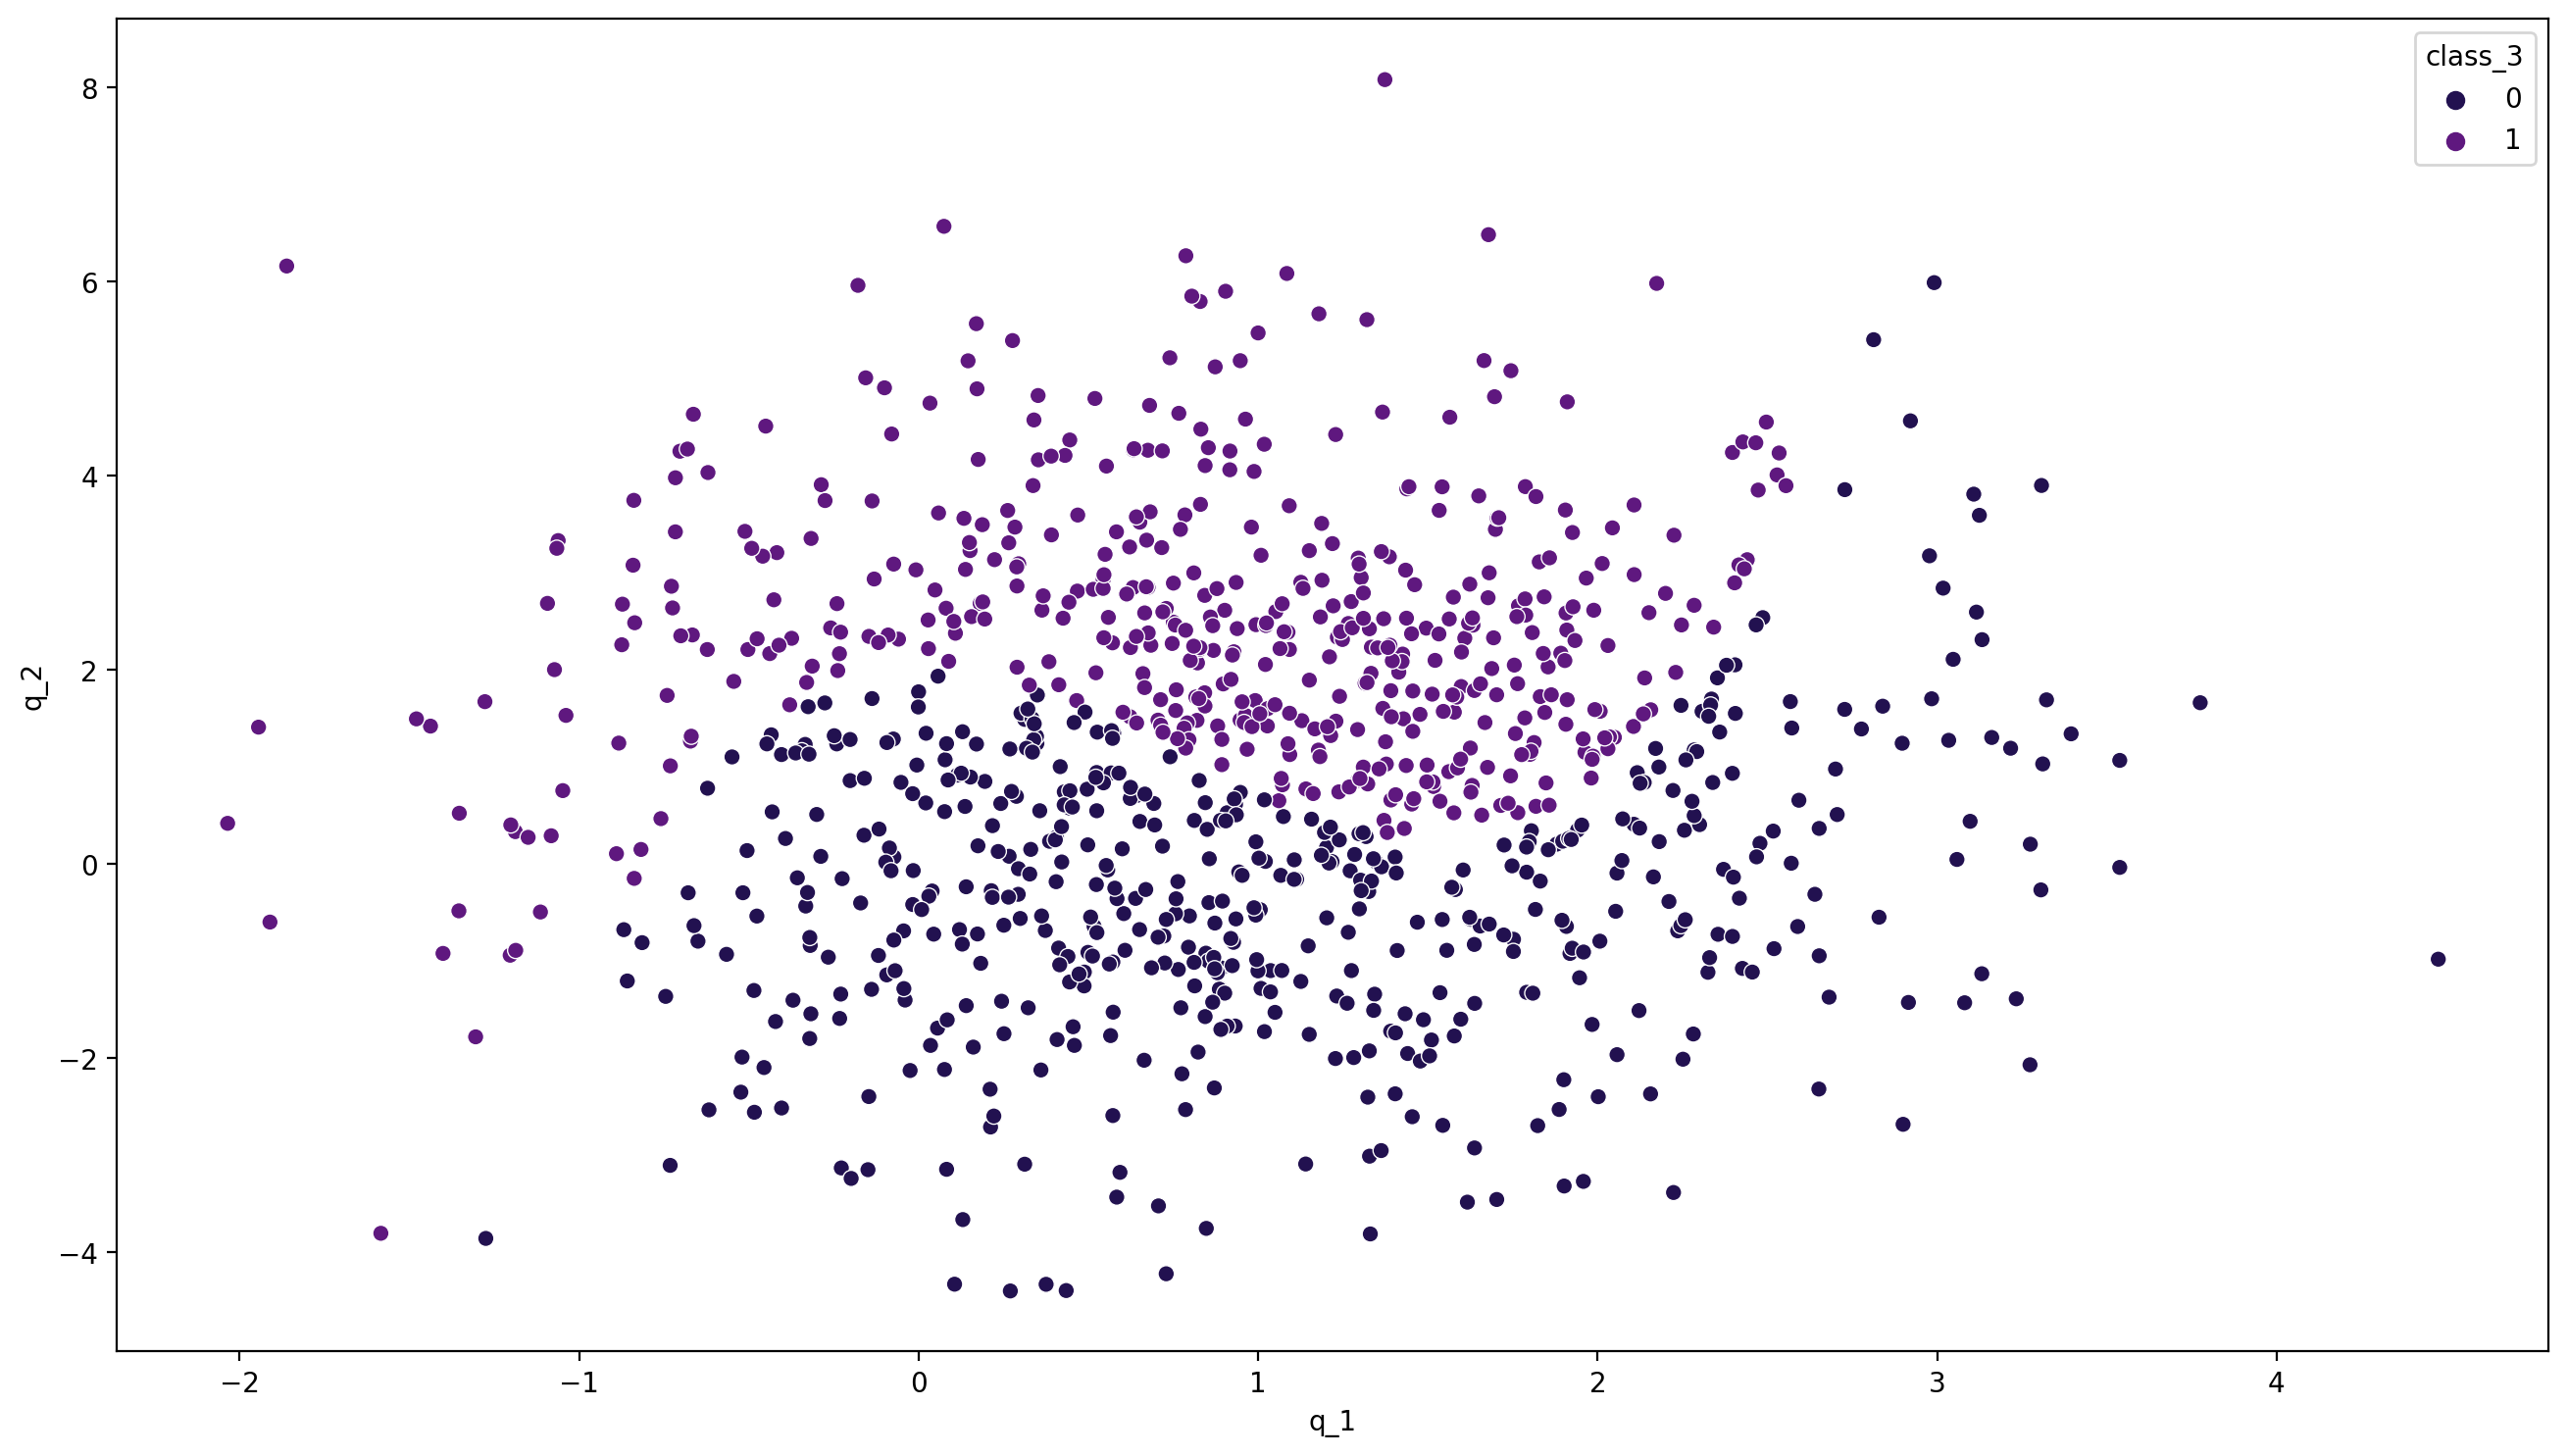

In [31]:
df = pd.DataFrame({'q_1':normal(1,1,1000),'q_2':normal(1,2,1000)})

df['class_1']=(df.q_2>-2*df.q_1+2).astype(int)
df['class_2']=(df.q_2>-2*df.q_1**2+2*df.q_1+2.5).astype(int)
df['class_3']=(df.q_2>3*(.33*df.q_1**3-0.75*df.q_1**2)+2).astype(int)



fig,ax = plt.subplots(figsize=(16,9))
ax = sns.scatterplot(data=df, x='q_1',y='q_2',hue='class_3')

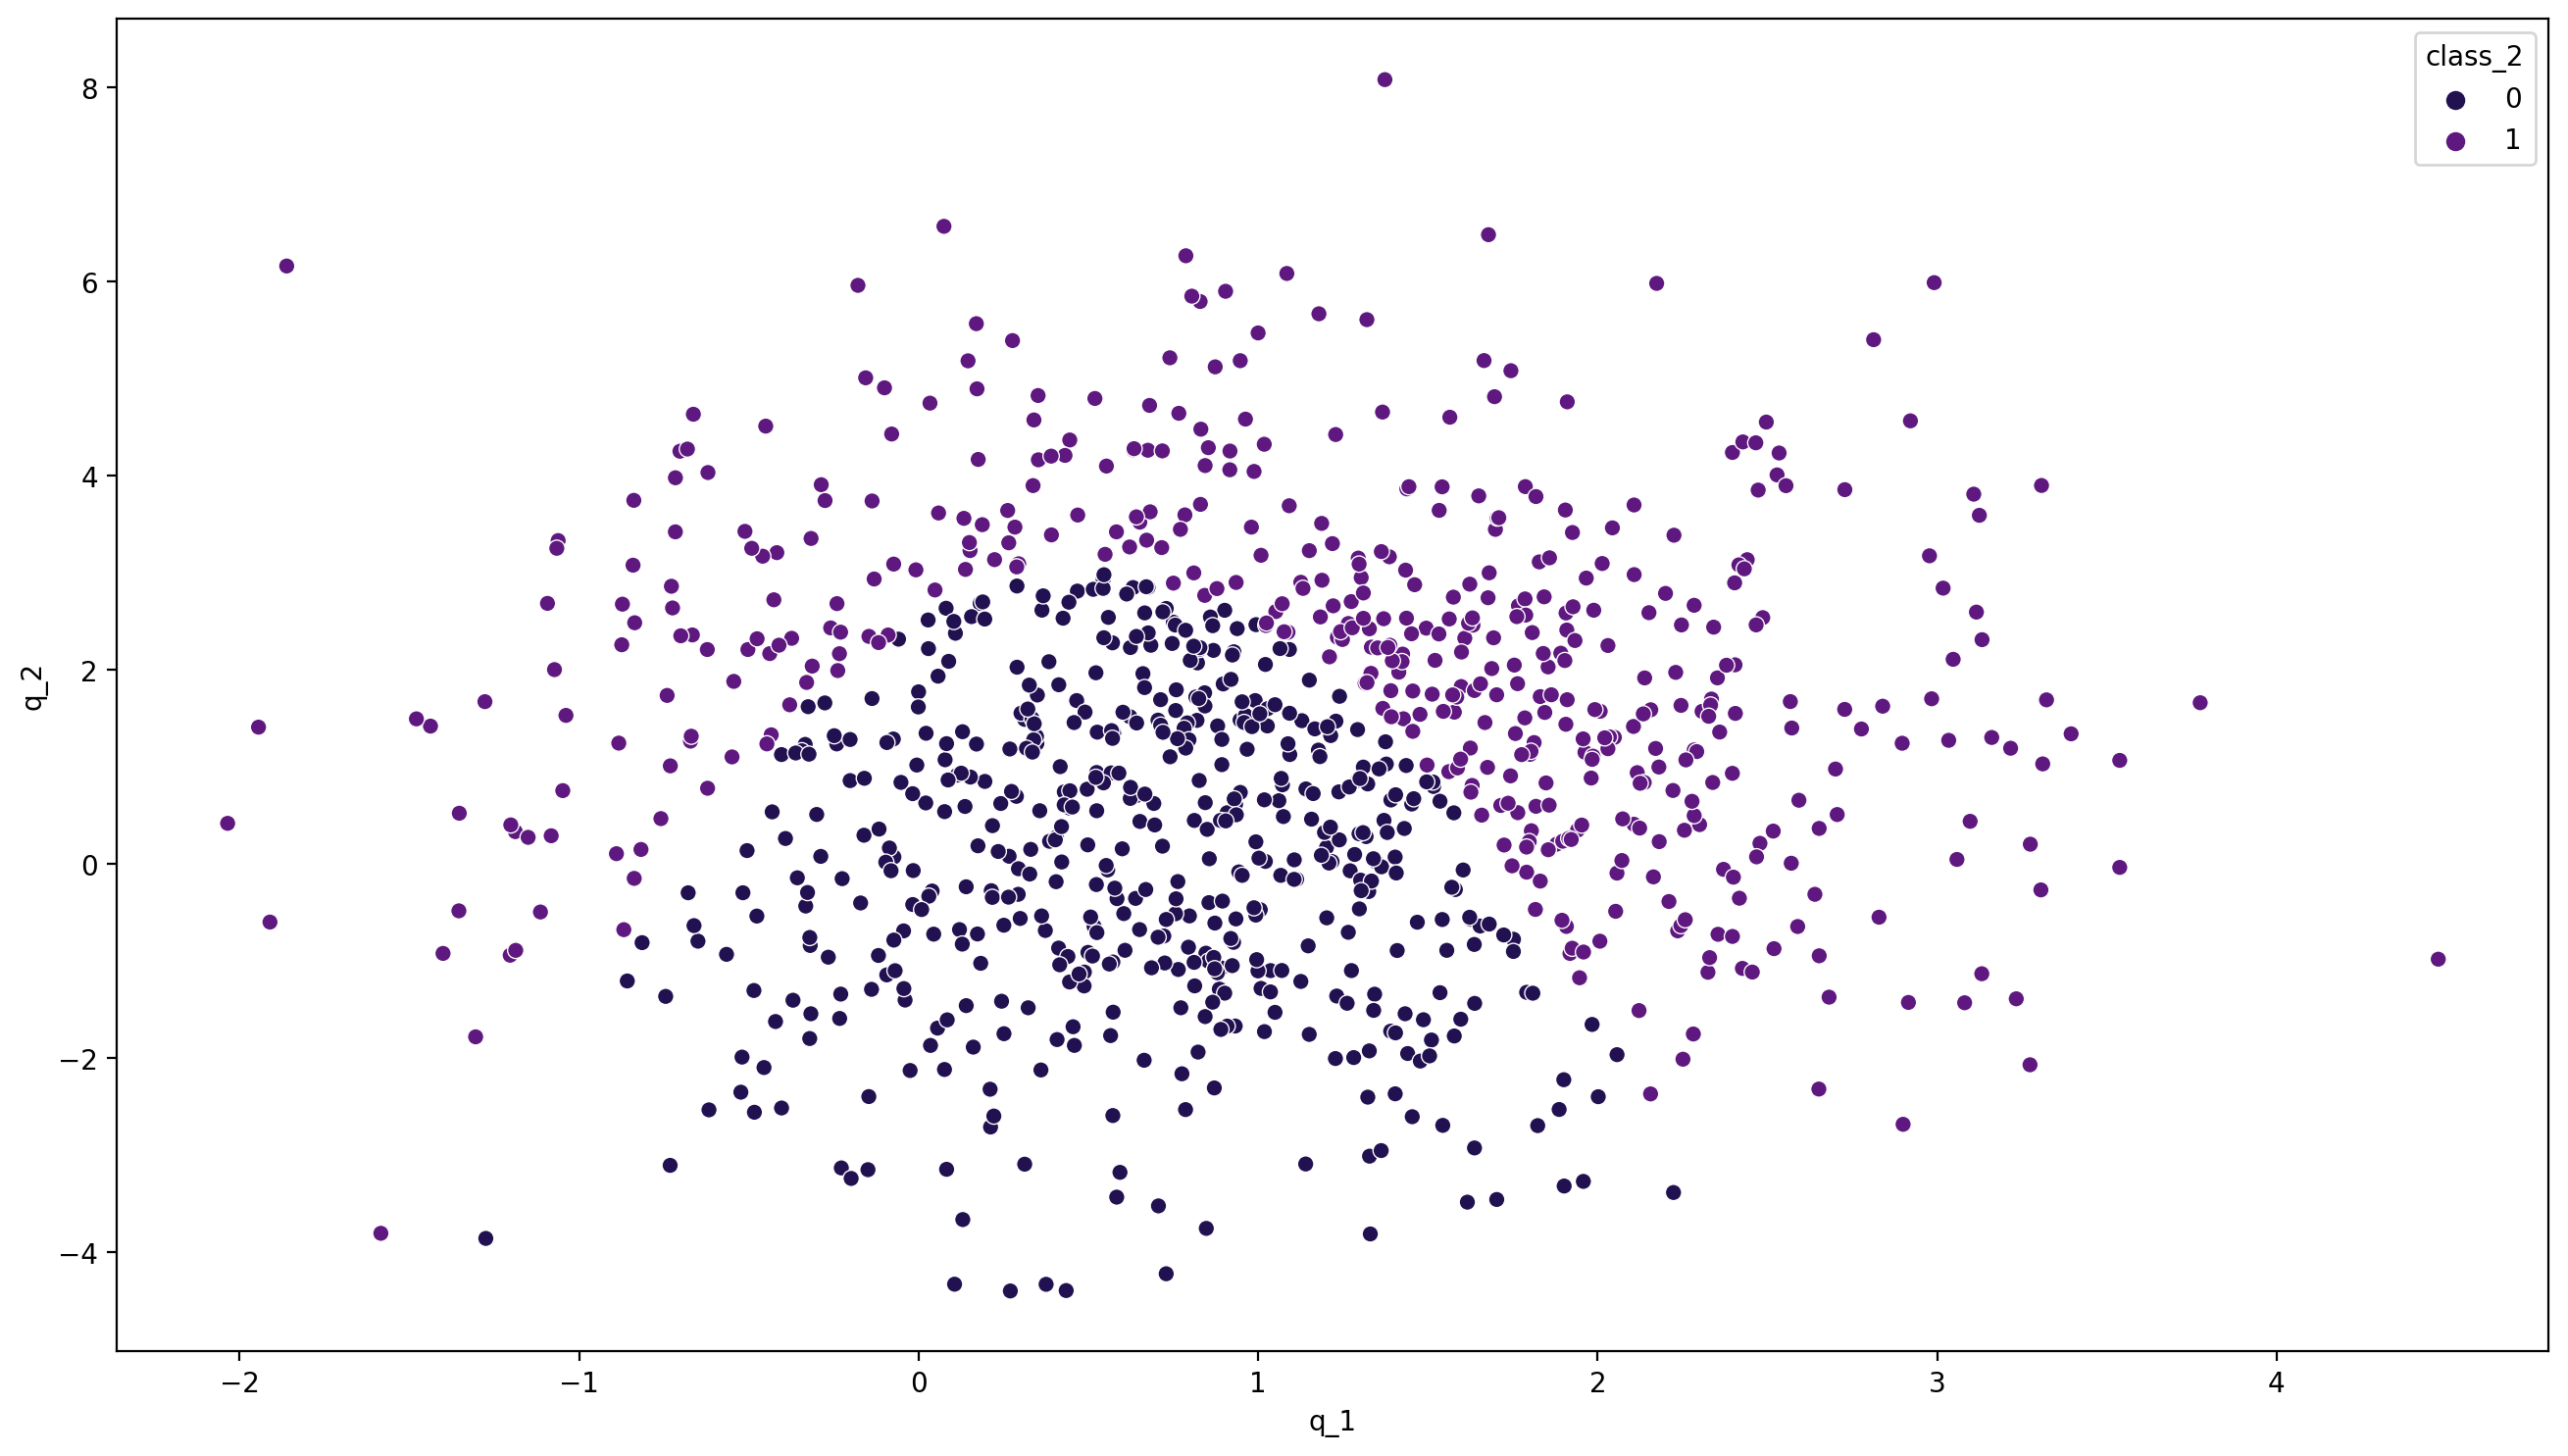

In [32]:
fig,ax = plt.subplots(figsize=(16,9))
ax = sns.scatterplot(data=df, x='q_1',y='q_2',hue='class_2')

In [88]:
X_non_linear = np.array([df.iloc[:,0].values,df.iloc[:,1].values,df.iloc[:,0].values**2,df.iloc[:,1].values**2,df.iloc[:,0].values*df.iloc[:,1].values]).T

X2_train,X2_test,y2_train, y2_test = train_test_split(X_non_linear,df.class_2.values)


In [106]:
def evaluate_score(a,b):
    if not a in [0,1]: raise ValueError('First argument is {} and should be either 0 or 1'.format(a))
    if not b in [0,1]: raise ValueError('Second argument is {} and should be either 0 or 1'.format(b))

    if a+b == 2: return 'TP'
    if a+b == 0: return 'TN'
    if a == 1: return 'FN'
    if a == 0: return 'FP'

def df_for_visualisation(features, labels, predictions):
    df_test = pd.DataFrame(features,columns=['q_1','q_2'])
    df_test['label'] = labels
    df_test['prediction'] = predictions
    df_test['score'] = [evaluate_score(*a) for a in tuple(zip(labels,predictions))]
    return df_test

def plot_classification_result(df_plot):
    fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,9),sharey=True)
    ax1 = sns.scatterplot(data=df_plot, x='q_1',y='q_2',hue='label',ax=ax1)
    ax1.set_xlabel('$q_1$')
    ax1.set_ylabel('$q_2$',rotation=0)
    ax2 = sns.scatterplot(data=df_plot, x='q_1',y='q_2',hue='prediction',ax=ax2)
    ax2.set_xlabel('$q_1$')
    ax3 = sns.scatterplot(data=df_plot, x='q_1',y='q_2',hue='score',ax=ax3)
    ax3.set_xlabel('$q_1$')

    return fig


def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth
    
    # Begin CHANGES
    fst_empty_cell = (columnwidth-3)//2 * " " + "t/p" + (columnwidth-3)//2 * " "
    
    if len(fst_empty_cell) < len(empty_cell):
        fst_empty_cell = " " * (len(empty_cell) - len(fst_empty_cell)) + fst_empty_cell
    # Print header
    print("    " + fst_empty_cell, end=" ")
    # End CHANGES
    
    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=" ")
        
    print()
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=" ")
        print()

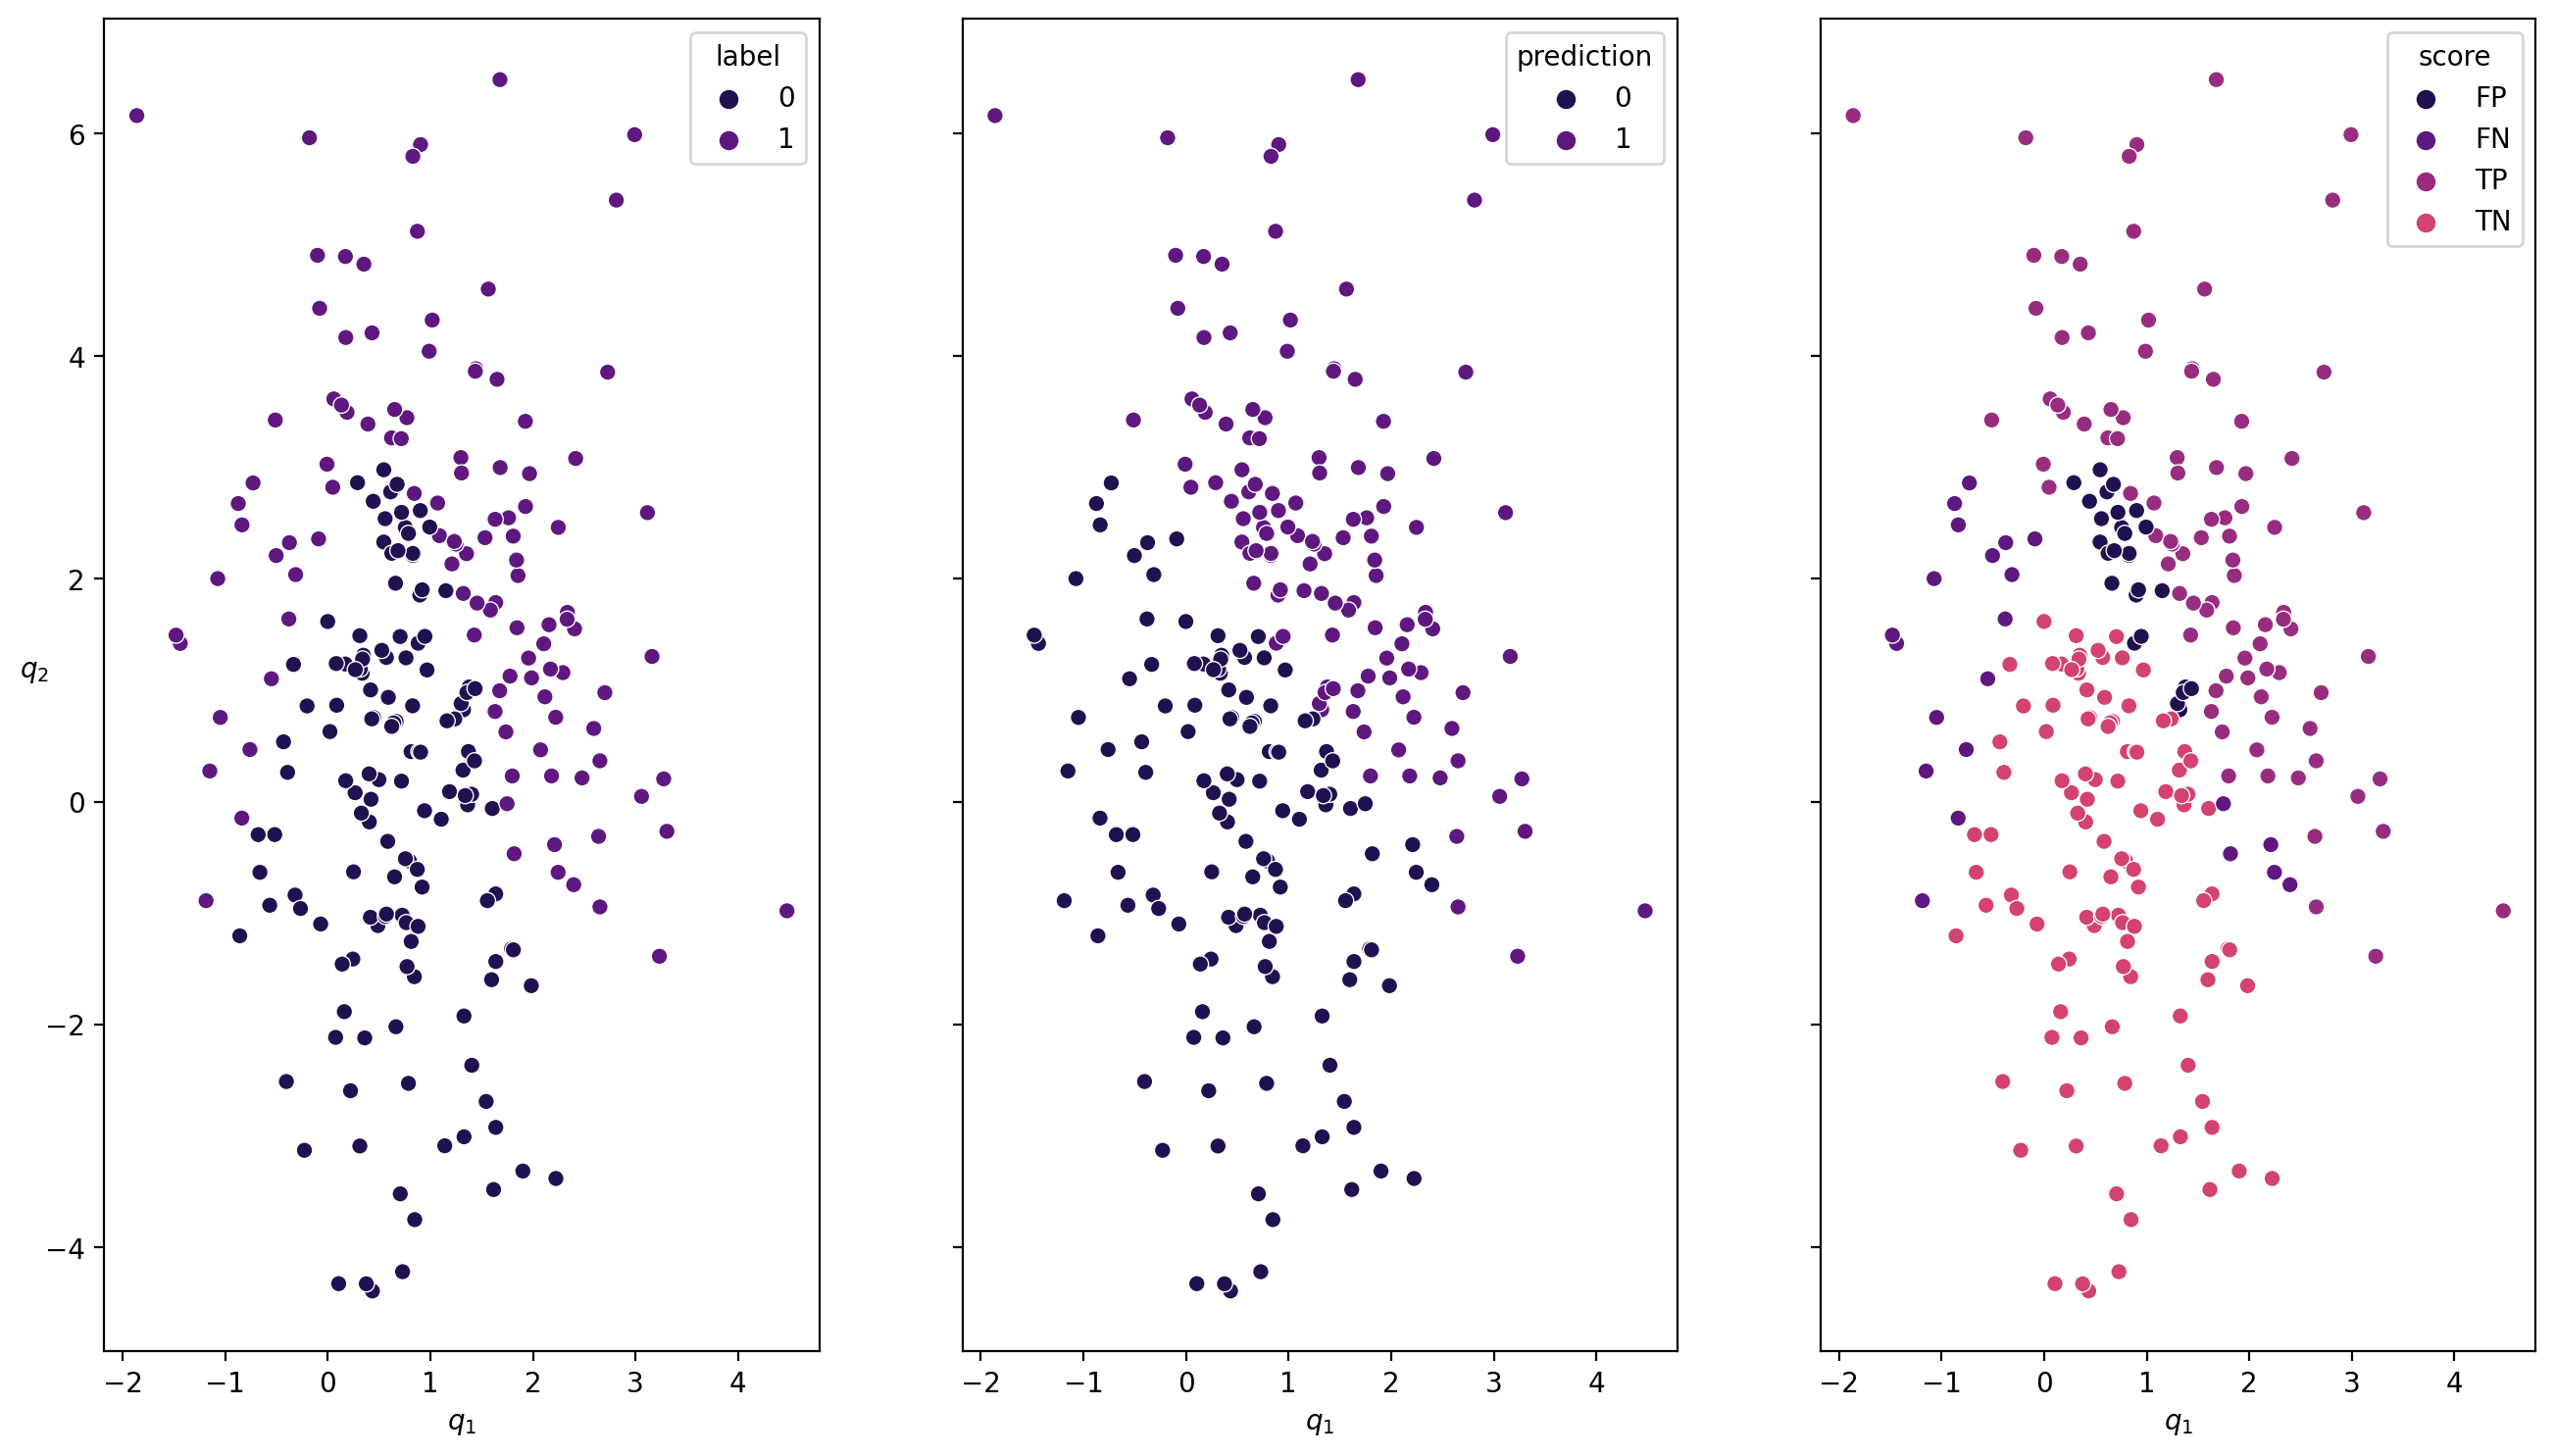

In [104]:
fig = plot_classification_result(df_for_visualisation(X2_test[:,:2],y2_test,clf_log.predict(X2_test[:,:2])))

plt.show(fig)

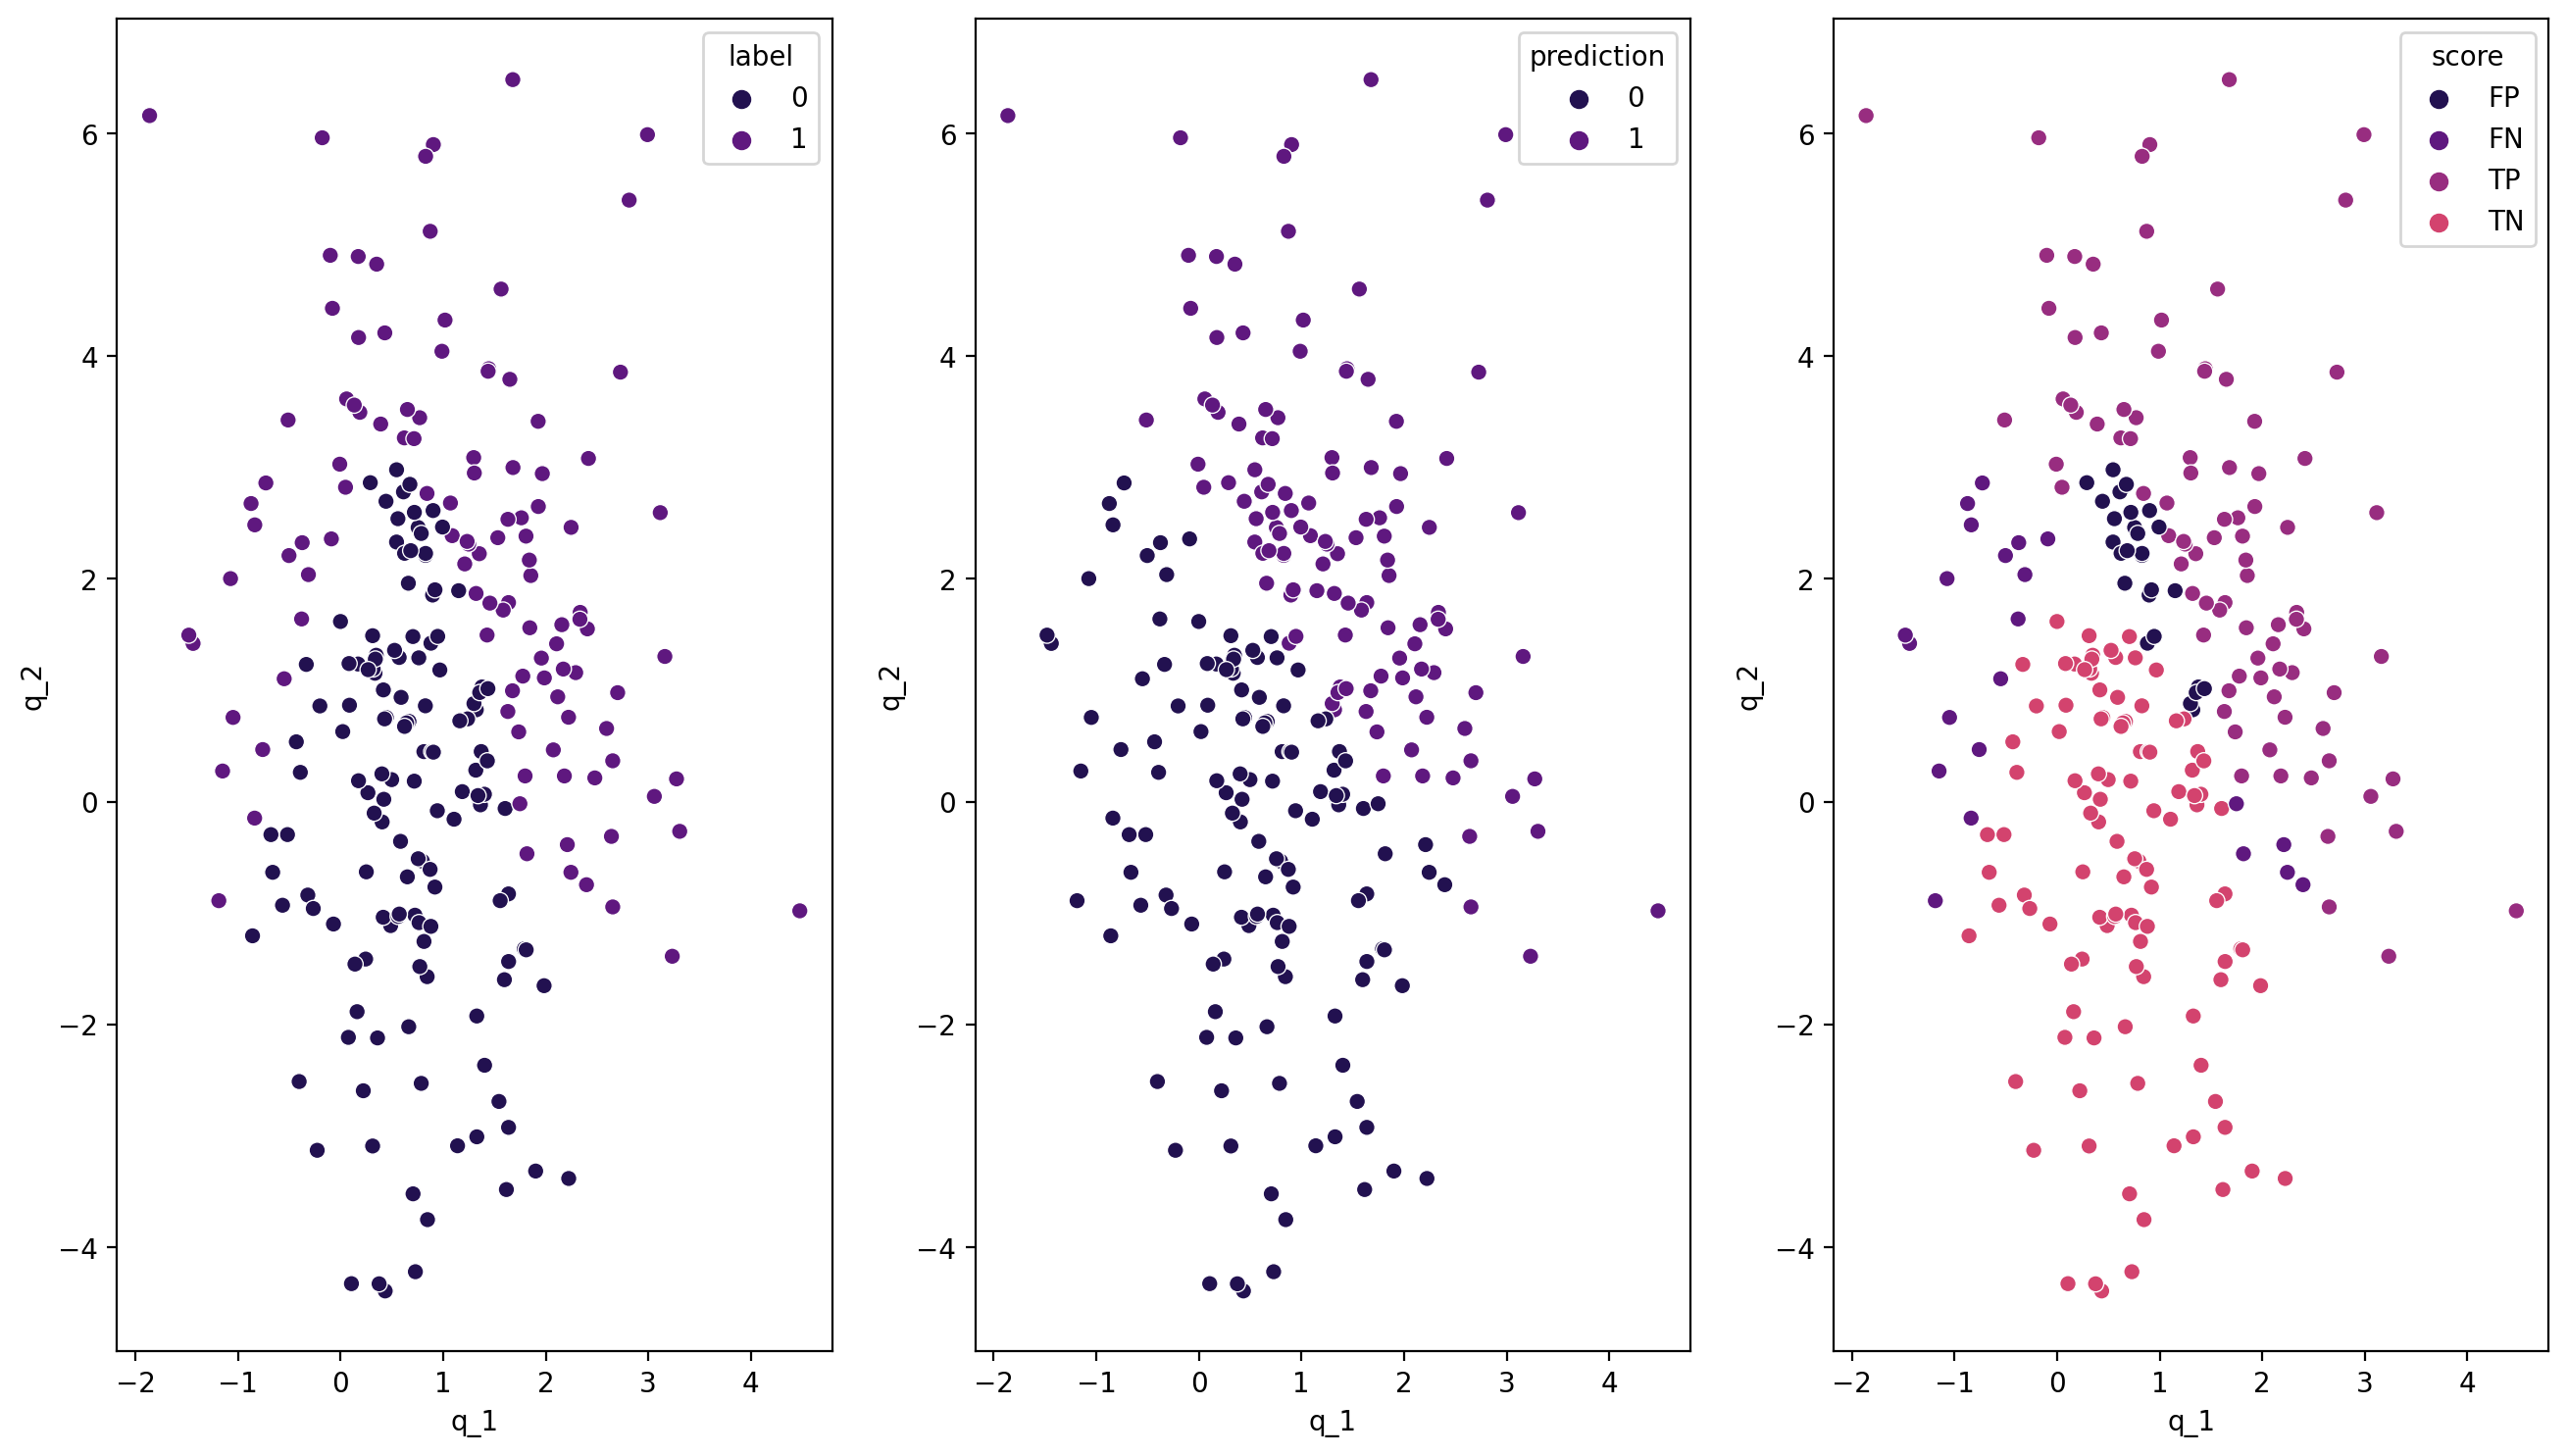

In [51]:
2 not in [0,1]

True

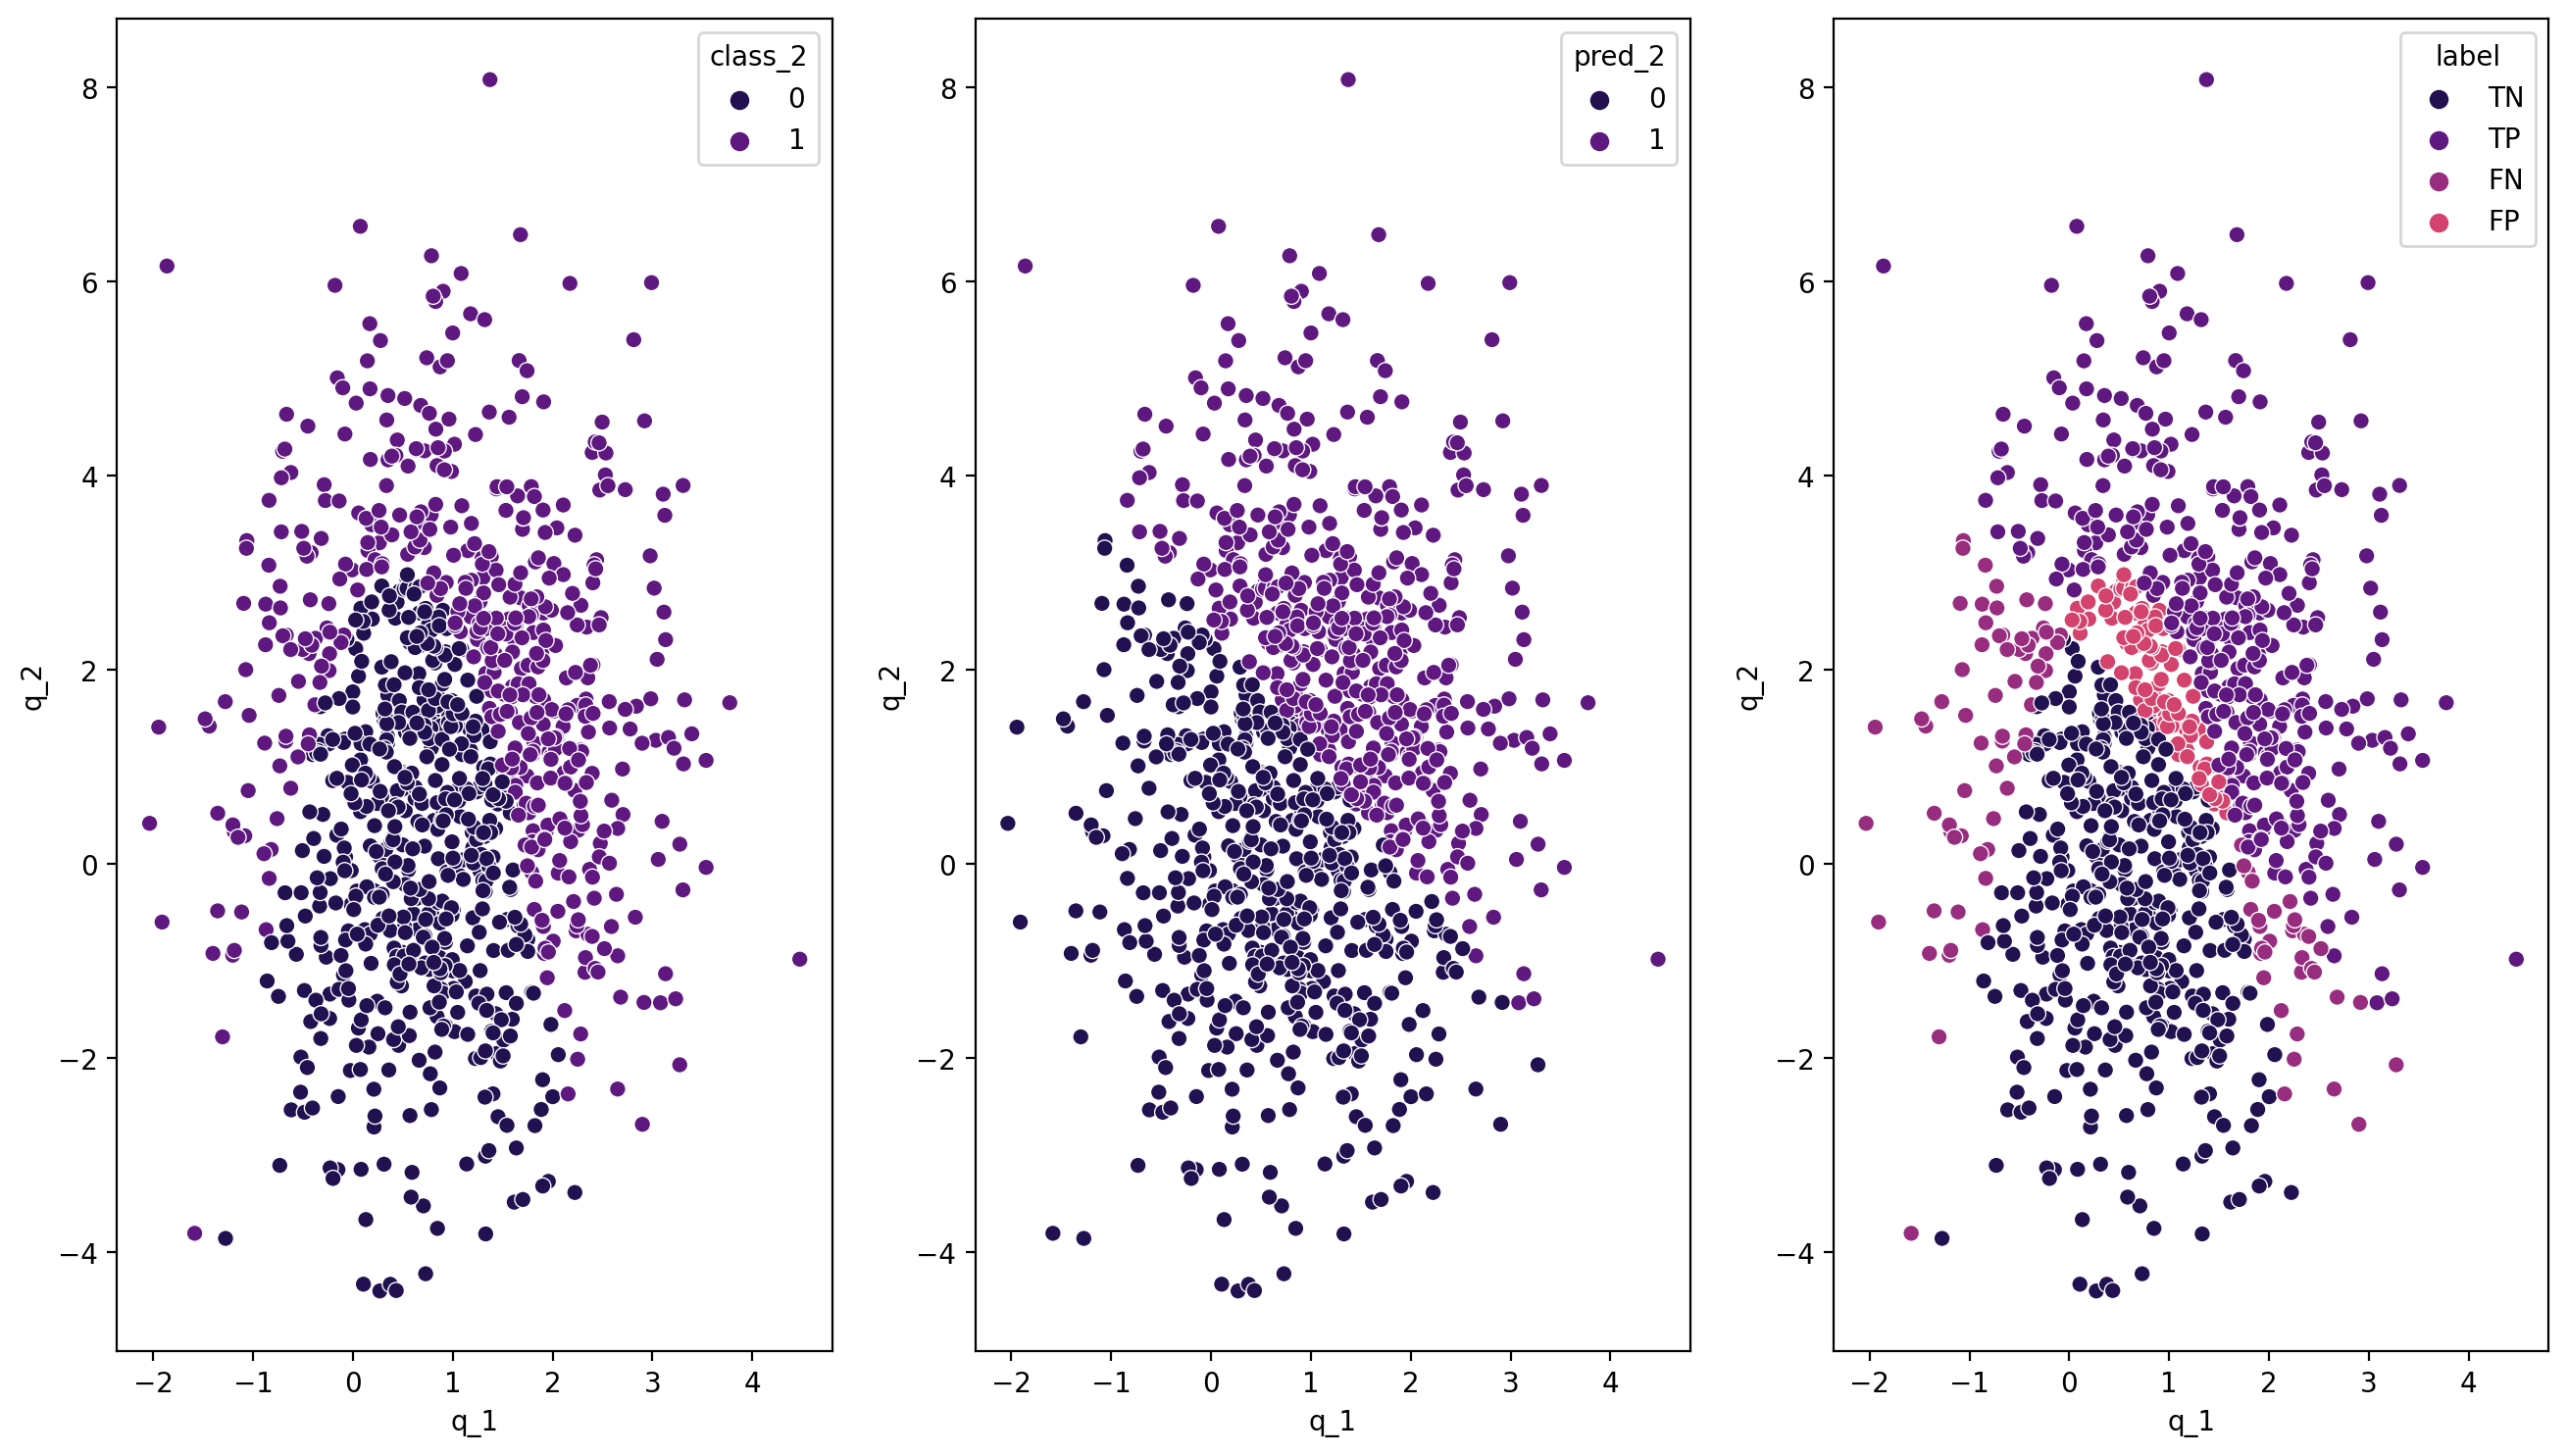

In [38]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression()
clf_log.fit(X2_train[:,:2],y2_train)
clf_log.score(X2_test[:,:2],y2_test)


df2 = df.copy()
df2['pred_2']=clf_log.predict(df2.iloc[:,:2].values)
df2['label'] = np.zeros(len(df2))
df2.loc[(df2.class_2+df2.pred_2) == 2,'label'] = 'TP'
df2.loc[(df2.class_2+df2.pred_2) == 0,'label'] = 'TN'
df2.loc[((df2.class_2+df2.pred_2) == 1) & (df2.class_2==0),'label'] = 'FP'
df2.loc[((df2.class_2+df2.pred_2) == 1) & (df2.class_2==1),'label'] = 'FN'


fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,9))
ax1 = sns.scatterplot(data=df2, x='q_1',y='q_2',hue='class_2',ax=ax1)
ax2 = sns.scatterplot(data=df2, x='q_1',y='q_2',hue='pred_2',ax=ax2)
ax3 = sns.scatterplot(data=df2, x='q_1',y='q_2',hue='label',ax=ax3)




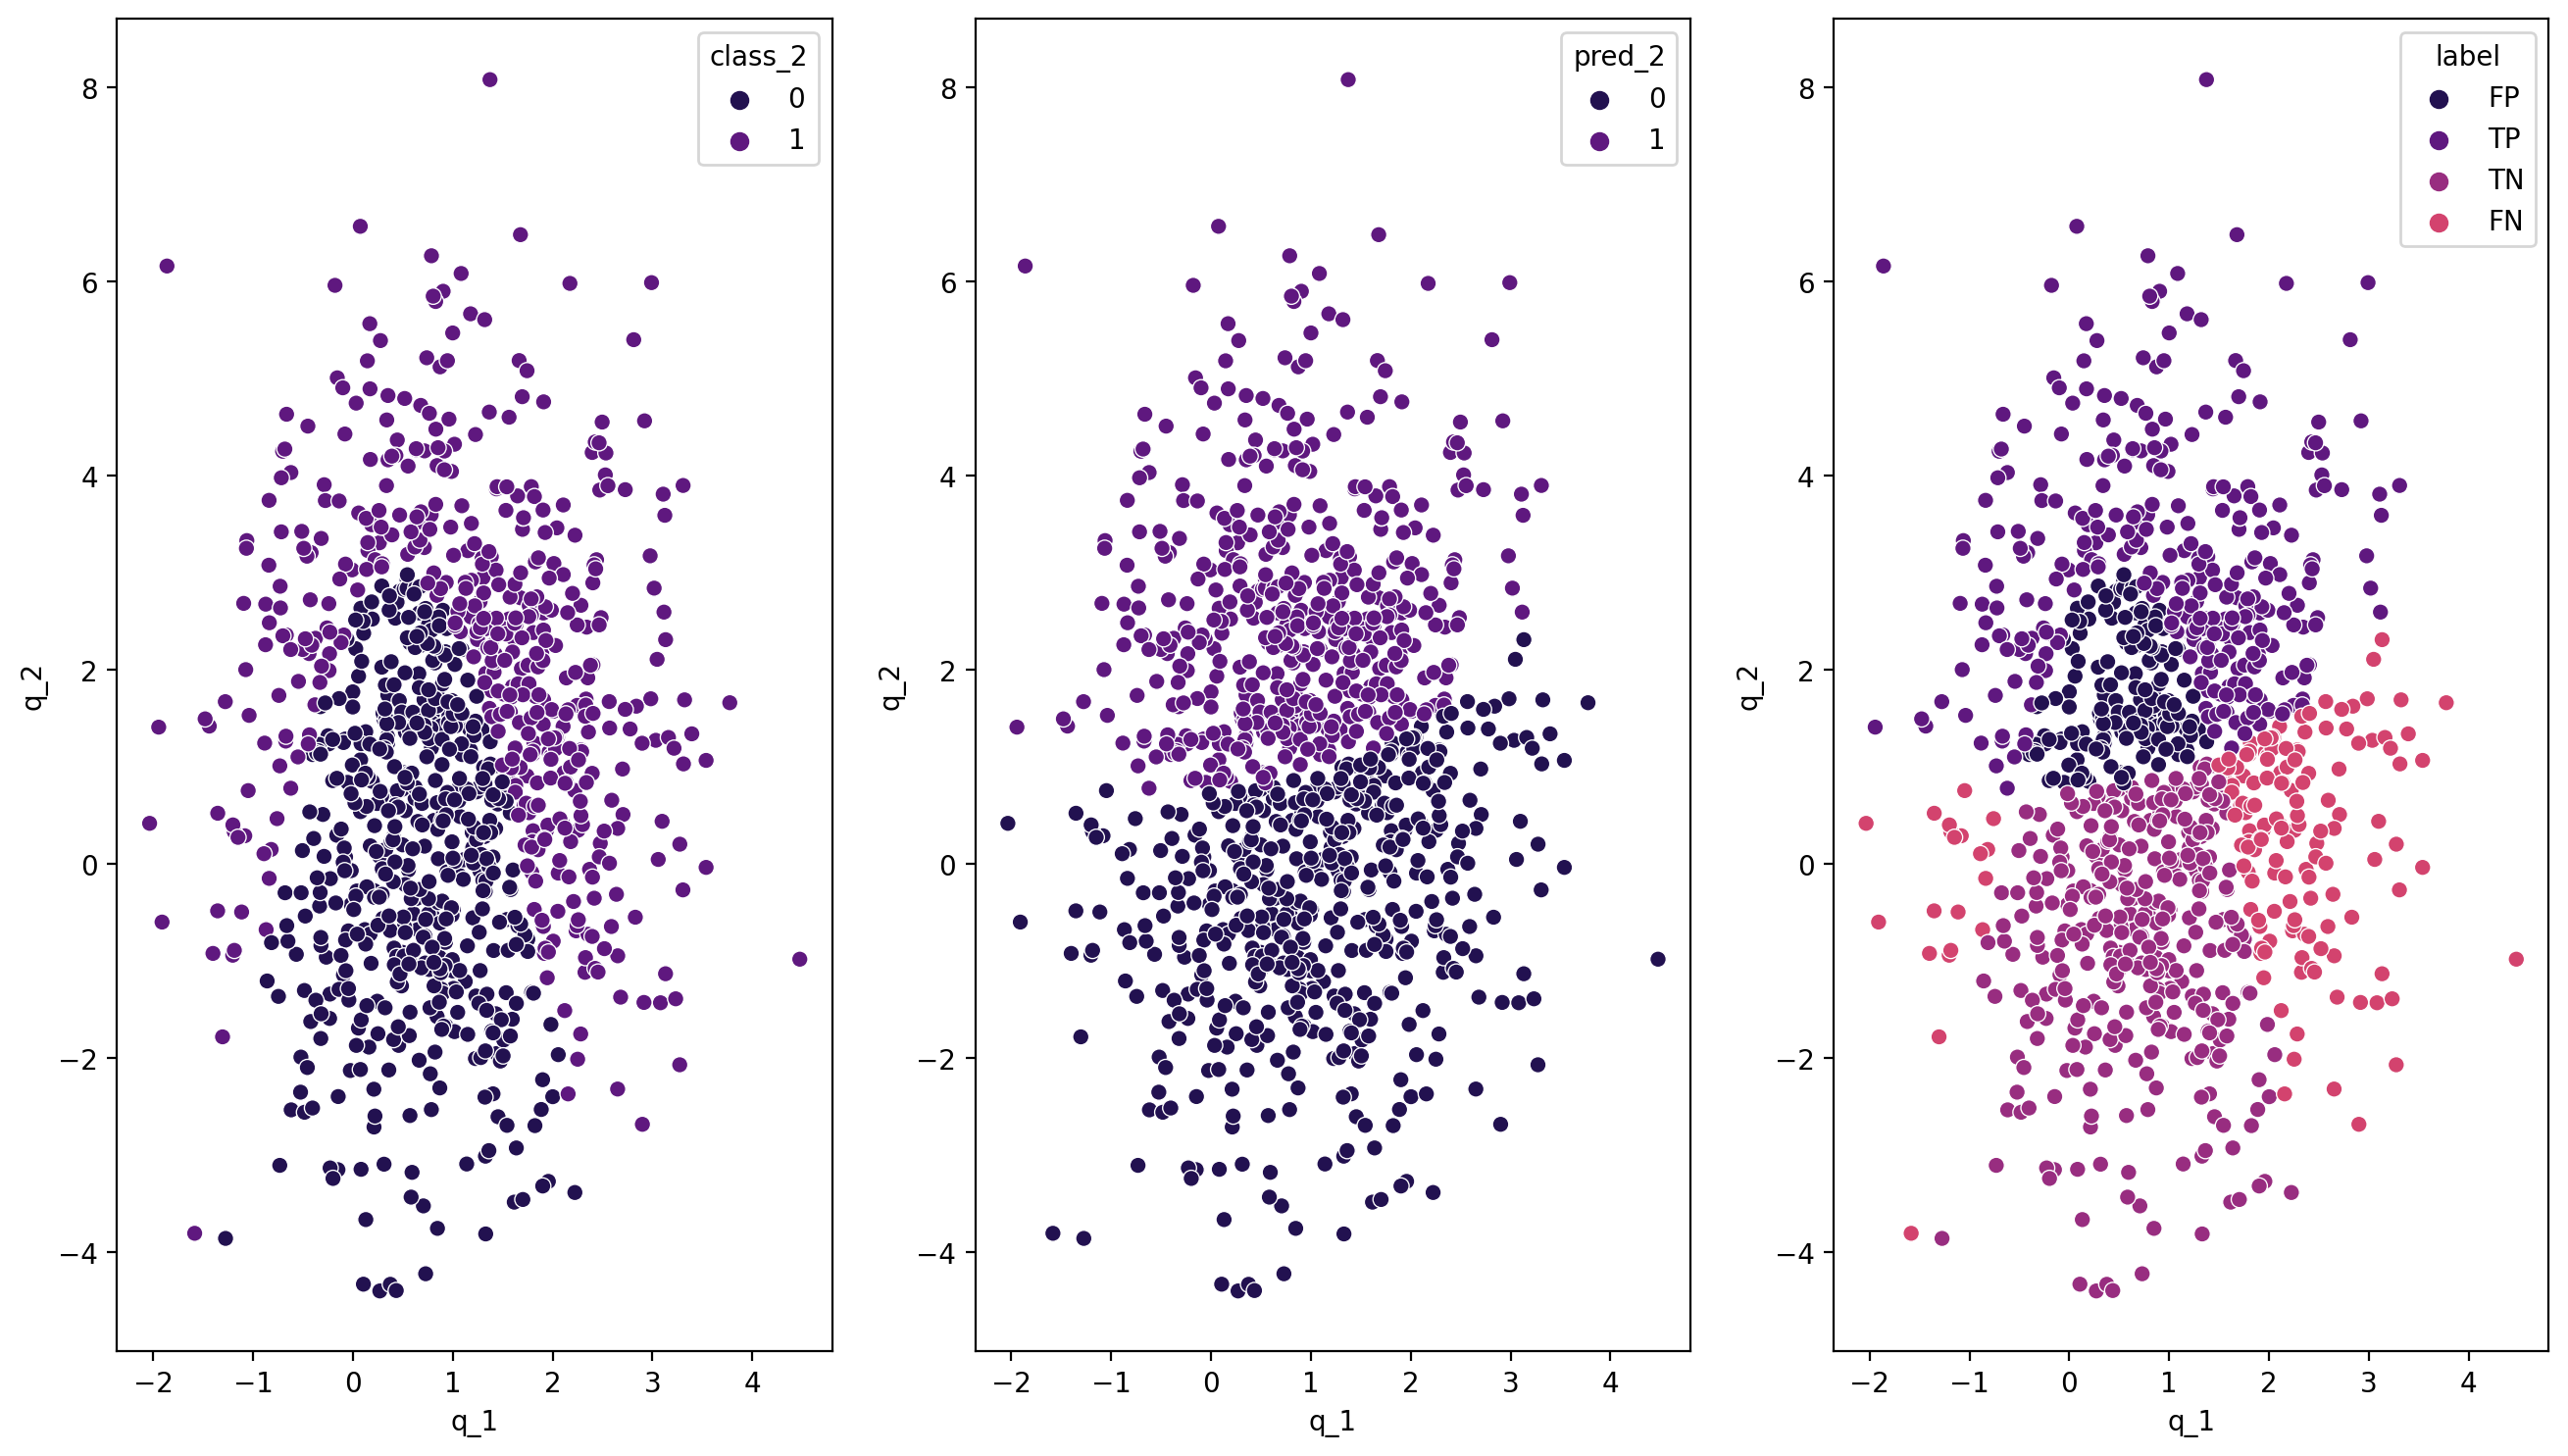

In [36]:

clf_log2 = LogisticRegression()
clf_log2.fit(X2_train,y2_train)
clf_log2.score(X2_test,y2_test)


df2 = df.copy()
df2['pred_2']=clf_log2.predict(X_non_linear)
df2['label'] = np.zeros(len(df2))
df2.loc[(df2.class_2+df2.pred_2) == 2,'label'] = 'TP'
df2.loc[(df2.class_2+df2.pred_2) == 0,'label'] = 'TN'
df2.loc[((df2.class_2+df2.pred_2) == 1) & (df2.class_2==0),'label'] = 'FP'
df2.loc[((df2.class_2+df2.pred_2) == 1) & (df2.class_2==1),'label'] = 'FN'


fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,9))
ax1 = sns.scatterplot(data=df2, x='q_1',y='q_2',hue='class_2',ax=ax1)
ax2 = sns.scatterplot(data=df2, x='q_1',y='q_2',hue='pred_2',ax=ax2)
ax3 = sns.scatterplot(data=df2, x='q_1',y='q_2',hue='label',ax=ax3)

In [7]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

print(classification_report(y2_test,clf_log2.predict(X2_test[:,:])))


              precision    recall  f1-score   support

           0       0.96      0.96      0.96       137
           1       0.95      0.95      0.95       113

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250



In [108]:
print_cm(confusion_matrix(y2_test,clf_log2.predict(X2_test[:,:])),['0','1'])

     t/p      0     1 
        0  96.0  42.0 
        1  37.0  75.0 


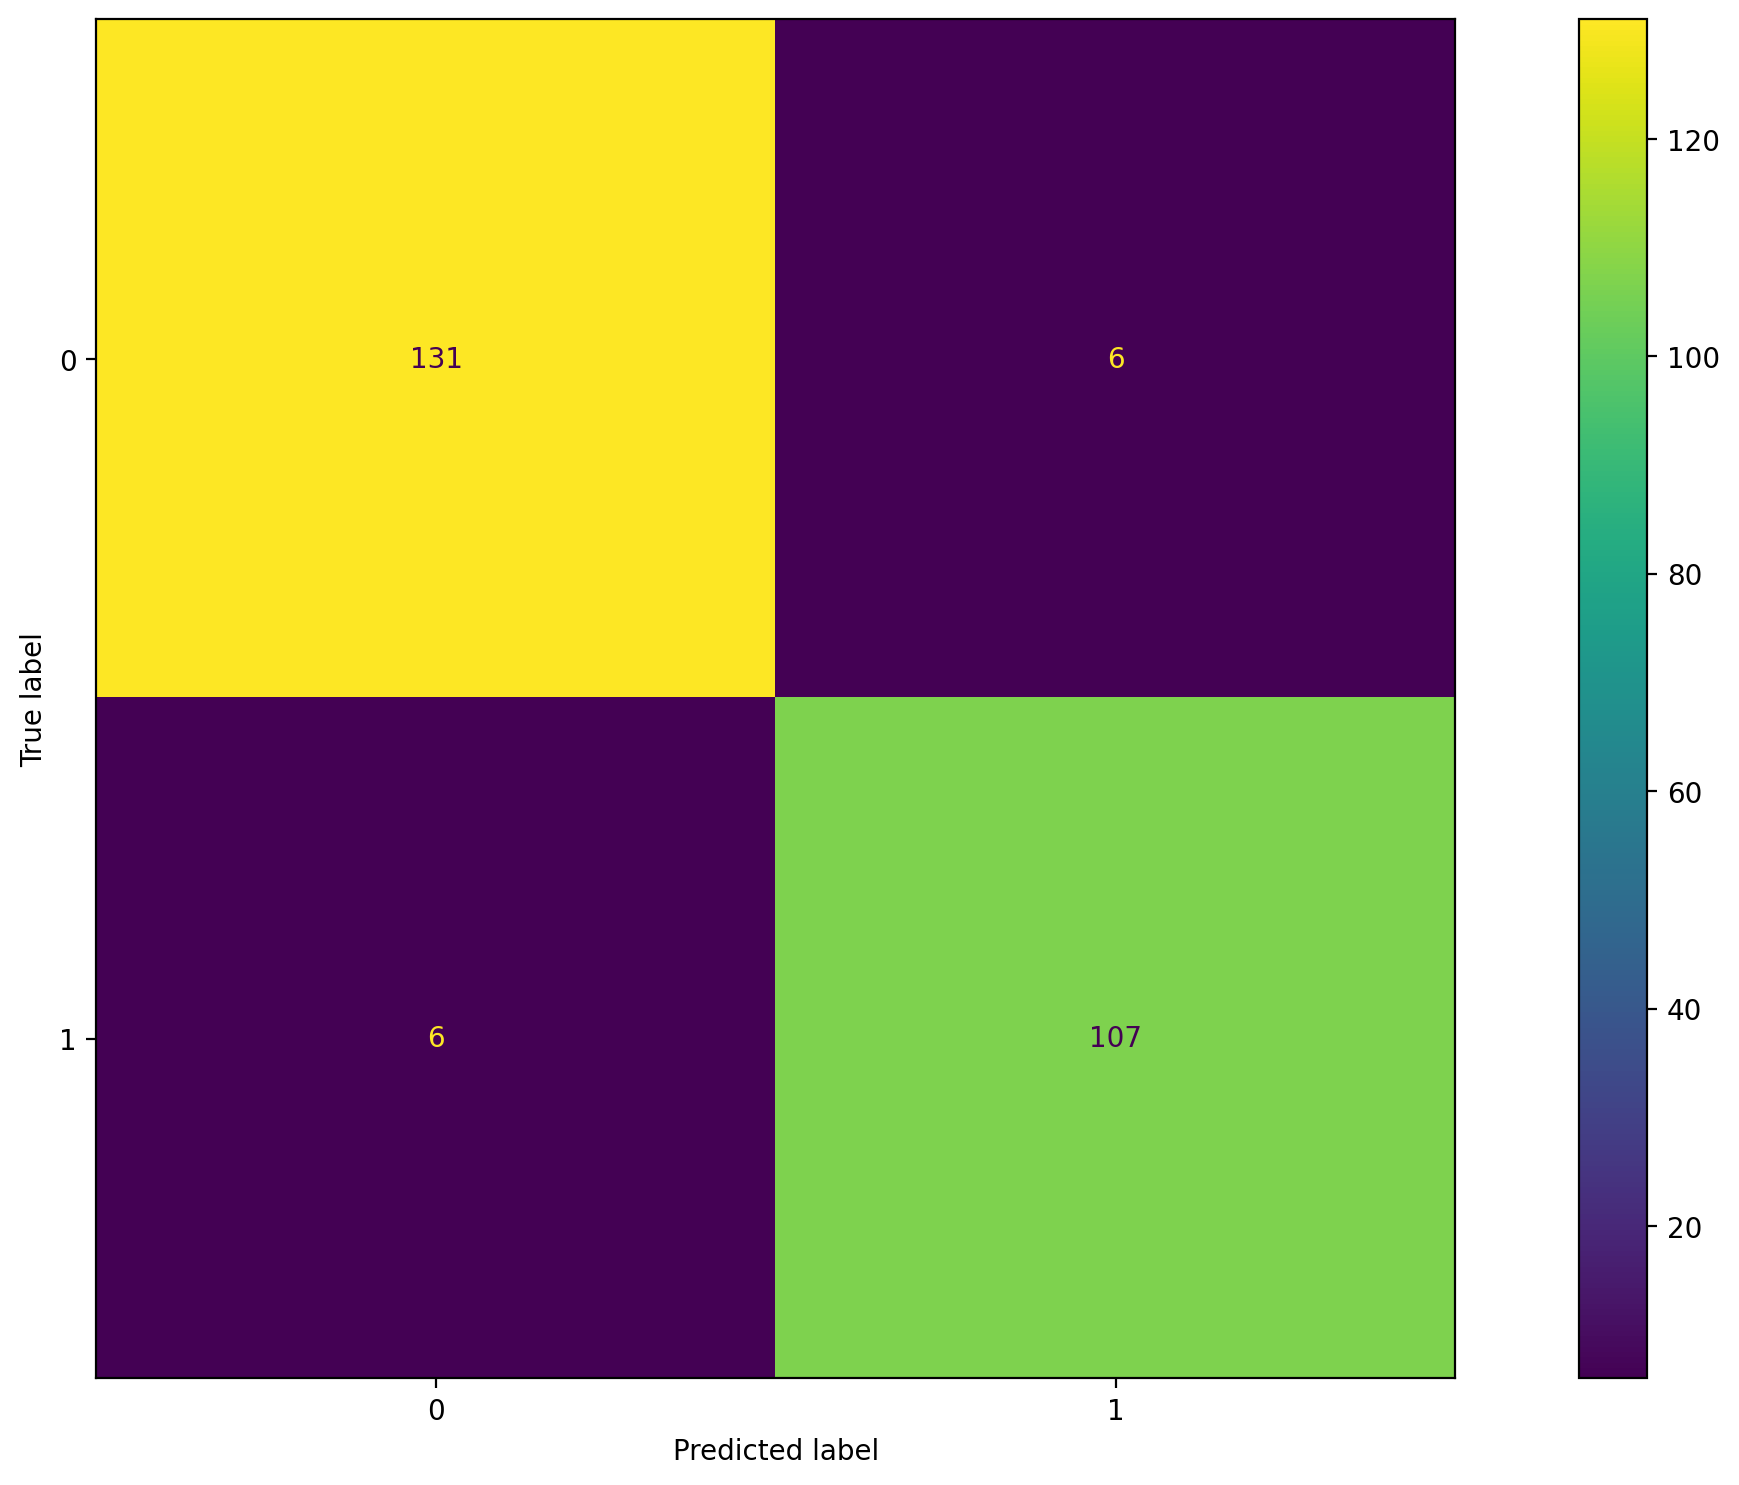

In [9]:
fig,ax = plt.subplots(figsize=(16,9))
ConfusionMatrixDisplay.from_predictions(y2_test,clf_log2.predict(X2_test[:,:]),ax=ax)

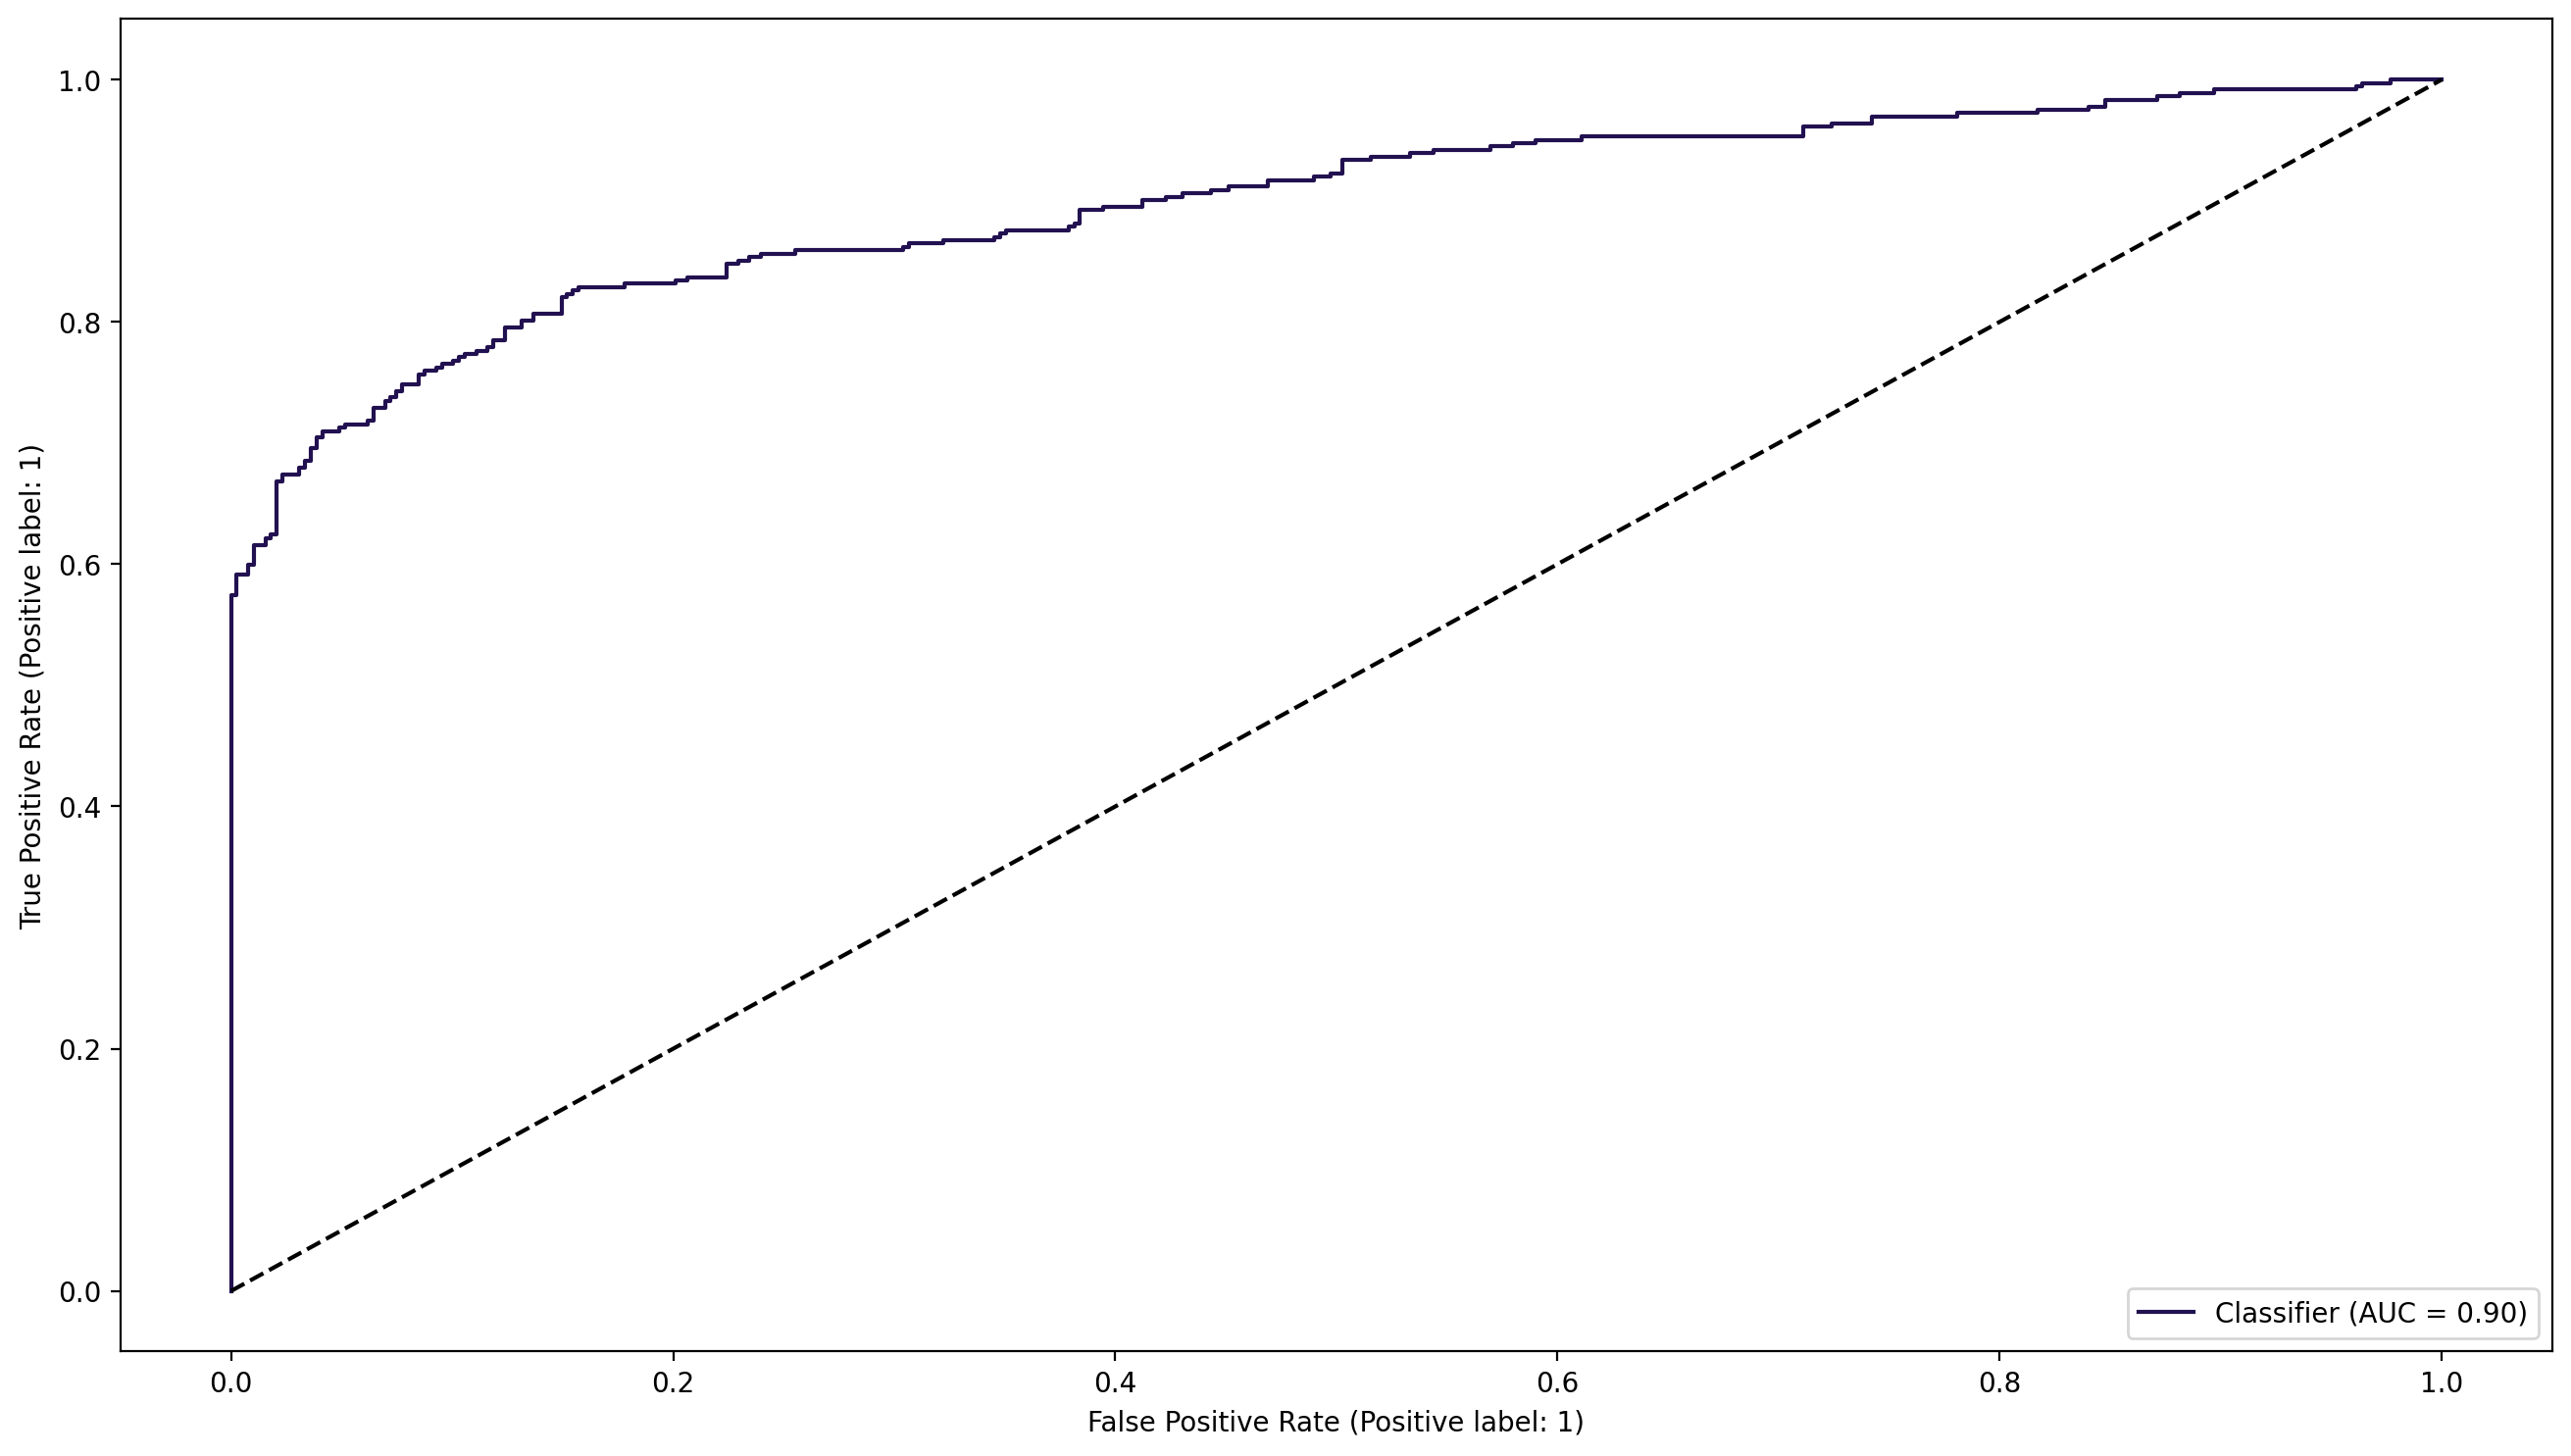

In [10]:
from sklearn.metrics import roc_curve,RocCurveDisplay

y2_score = clf_log.predict_proba(X2_train[:,:2])[:,1]
fpr, tpr, thresholds = roc_curve(y2_train, y2_train)

fig,ax = plt.subplots(figsize=(16,9))

RocCurveDisplay.from_predictions(y2_train,y2_score,ax=ax)
ax.plot([0,1],[0,1],c='black',linestyle = '--')
plt.show()

In [ ]:
print(y2_score.shape)

In [ ]:
y2_score